# Laboratorio 1

integrantes: 

    - Francis Aguilar - 22243 
    - Angela García -22869 

enlace al repositorio: https://github.com/angelargd8/lab1-ds

In [44]:
import pandas as pd
import numpy as np
import sys
import os
import lxml

In [45]:

#cargar el archivo
file = "./data/Estadisticas_historicas_comercializacion.xlsx"

#ver las hojas del archivo
xls = pd.ExcelFile(file)
sheet_names = xls.sheet_names
sheet_names


['IMPORTACION', 'COSTO IMPORTACION', 'CONSUMO', 'EXPORTACION']

In [46]:
#cargar las hojs que nos interesan que son las de importacion y la de consumo

importacion_df = pd.read_excel(file, sheet_name='IMPORTACION')
consumo_df = pd.read_excel(file, sheet_name="CONSUMO")


## Analisis Exploratorio

In [47]:
#exploracion de datos

#ver las primeras filas
importacion_head = importacion_df.head()
consumo_head = consumo_df.head()

importacion_head

consumo_head

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Unidad: Barril (42 galones),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#limpiar a la primera fila que tenga fecha 

def clean(sheet):
    raw_df = pd.read_excel(file, sheet_name=sheet)
    #encontrar el indice del encabezado
    header_idx = raw_df[raw_df.apply(lambda row: row.astype(str).str.contains("Fecha").any(), axis=1)].index[0]
    df= pd.read_excel(file, sheet_name=sheet, skiprows=header_idx )
    return df

importacion_clean_df = clean('IMPORTACION')
consumo_clean_df = clean('CONSUMO')



In [49]:
#ver las primeras filas
importacion_head = importacion_clean_df.head()
consumo_head = consumo_clean_df.head()

importacion_head

consumo_head

,Unidad: Barril (42 galones),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gas natural,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
1,2000-01-01 00:00:00,0,48446,296766.99,0,0,0,0,194410.47619,NaN,...,64026.09,0,0,0,0,0,0,634667.06,0,1750544.63619
2,2000-02-01 00:00:00,0,50597,328116.44,0,0,0,0,174710.552381,NaN,...,62660.3,0,0,0,0,0,0,642380.66,0,1773220.222381
3,2000-03-01 00:00:00,0,27593,368589.63,0,0,0,0,189234.066667,NaN,...,61361.99,0,0,0,0,0,0,699807.25,0,1909498.786667
4,2000-04-01 00:00:00,0,53794,396300.47,0,0,0,0,174330.607143,NaN,...,61814.32,0,0,0,0,0,0,586803.98,0,1800932.857143


In [50]:


print("importacion:")
#ajustar nombers de las columanas
importacion_clean_df.columns = importacion_clean_df.iloc[0] #usar la primera fila de encabezado
importacion_clean_df = importacion_clean_df[1:] #quitar la fila
# importacion_clean_df =importacion_clean_df.columns.str.strip() #quitar los espacios


print("consumo:")
consumo_clean_df.columns = consumo_clean_df.iloc[0] #usar la primera fila de encabezado
consumo_clean_df = consumo_clean_df[1:] #quitar la fila
# consumo_clean_df =consumo_clean_df.columns.str.strip() #quitar los espacios

#ver primeras
print(importacion_clean_df.head())
print(consumo_clean_df.head())



importacion:
consumo:
0                Fecha Aceites lubricantes  Asfalto      Bunker Ceras  \
1  2001-01-01 00:00:00                   0  27748.99  214581.84     0   
2  2001-02-01 00:00:00                   0   7503.57     294609     0   
3  2001-03-01 00:00:00                   0  26304.32   315263.8     0   
4  2001-04-01 00:00:00                   0   7885.89     205653     0   
5  2001-05-01 00:00:00                   0   8443.16   278371.3     0   

0 Combustible turbo jet Diesel bajo azufre Diesel ultra bajo azufre  \
1                     0                  0                        0   
2                     0                  0                        0   
3                     0                  0                        0   
4                     0                  0                        0   
5                     0                  0                        0   

0 Gas licuado de petróleo Gasolina de aviación  ... Naftas Petcoke  \
1           194065.738095                 

In [51]:

#mostrar las columnas
print("-- columnas --")
print("importacion:")
print(importacion_clean_df.columns) 
print("tamanio de importacion: " + str(importacion_clean_df.shape))
print("consumo:")
print(consumo_clean_df.columns)
print("tamanio de consumo: " + str(importacion_clean_df.shape))


-- columnas --
importacion:
Index(['Fecha', 'Aceites lubricantes', 'Asfalto ', 'Bunker', 'Ceras',
       'Combustible turbo jet', 'Diesel bajo azufre',
       'Diesel ultra bajo azufre', 'Gas licuado de petróleo',
       'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior',
       'Grasas lubricantes', 'Kerosina', 'Mezclas oleosas', 'Naftas',
       'Petcoke', 'Petróleo crudo', 'Solventes', 'Butano',
       'Diesel alto azufre', 'MTBE', 'Orimulsión', 'Petróleo reconstituido',
       'Total importación'],
      dtype='object', name=0)
tamanio de importacion: (291, 25)
consumo:
Index(['Fecha', 'Aceites lubricantes', 'Asfalto', 'Bunker', 'Ceras',
       'Combustible turbo jet', 'Diesel bajo azufre',
       'Diesel ultra bajo azufre', 'Gas licuado de petróleo', 'Gas natural',
       'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior',
       'Grasas lubricantes', 'Kerosina', 'Mezclas\noleosas', 'Naftas',
       'PetCoke', 'Petróleo crudo', 'Solventes', 'Butano',
    

In [52]:
#tamanio del dataset
print("importacion:")
print(str(importacion_clean_df.shape))
print("consumo:")
print(str(consumo_clean_df.shape))


importacion:
(291, 25)
consumo:
(303, 24)


In [53]:
#revisar el tipo de datos
print("importacion:")
print(str(importacion_clean_df.info()))
print("consumo:")
print(str(consumo_clean_df.info()))

importacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 1 to 291
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Fecha                     290 non-null    object
 1   Aceites lubricantes       288 non-null    object
 2   Asfalto                   288 non-null    object
 3   Bunker                    288 non-null    object
 4   Ceras                     287 non-null    object
 5   Combustible turbo jet     288 non-null    object
 6   Diesel bajo azufre        288 non-null    object
 7   Diesel ultra bajo azufre  288 non-null    object
 8   Gas licuado de petróleo   288 non-null    object
 9   Gasolina de aviación      288 non-null    object
 10  Gasolina regular          288 non-null    object
 11  Gasolina superior         288 non-null    object
 12  Grasas lubricantes        288 non-null    object
 13  Kerosina                  288 non-null    object
 14  Mezclas oleos

In [54]:
#contar nuls
print(importacion_clean_df.isnull().sum())
print(consumo_clean_df.isnull().sum())

0
Fecha                       1
Aceites lubricantes         3
Asfalto                     3
Bunker                      3
Ceras                       4
Combustible turbo jet       3
Diesel bajo azufre          3
Diesel ultra bajo azufre    3
Gas licuado de petróleo     3
Gasolina de aviación        3
Gasolina regular            3
Gasolina superior           3
Grasas lubricantes          3
Kerosina                    3
Mezclas oleosas             3
Naftas                      3
Petcoke                     3
Petróleo crudo              3
Solventes                   3
Butano                      3
Diesel alto azufre          3
MTBE                        3
Orimulsión                  3
Petróleo reconstituido      3
Total importación           3
dtype: int64
0
Fecha                         1
Aceites lubricantes           3
Asfalto                       3
Bunker                        3
Ceras                         5
Combustible turbo jet         3
Diesel bajo azufre            3
Diesel ul

In [55]:
#quitar los nuls y columnas innecesarias

# #eliminar la columna de gas natural porque tiene 297 datos faltantes de 303
# print(consumo_clean_df["Gas natural"].isnull().sum()) #igual, se eliminaria con las columnas que no son necesarias 
# consumo_clean_df.drop(columns="Gas natural", inplace=True)


#eliminar las columnas que no son de gasolinas regular super y diesel
colunmas_necesarias = [
    "Fecha", 
    "Gasolina regular", 
    "Gasolina superior", 
    "Diesel bajo azufre",
    "Diesel ultra bajo azufre",
    "Diesel alto azufre"
]

importacion_clean_df = importacion_clean_df[colunmas_necesarias]
consumo_clean_df = consumo_clean_df[colunmas_necesarias]

#dropear los datos faltantes
importacion_clean_df = importacion_clean_df.dropna()
consumo_clean_df = consumo_clean_df.dropna()

print(importacion_clean_df.isnull().sum())
print(consumo_clean_df.isnull().sum())

0
Fecha                       0
Gasolina regular            0
Gasolina superior           0
Diesel bajo azufre          0
Diesel ultra bajo azufre    0
Diesel alto azufre          0
dtype: int64
0
Fecha                       0
Gasolina regular            0
Gasolina superior           0
Diesel bajo azufre          0
Diesel ultra bajo azufre    0
Diesel alto azufre          0
dtype: int64


In [56]:
#convertir la columna de fecha a tipo datetime
importacion_clean_df["Fecha"] = pd.to_datetime(importacion_clean_df["Fecha"])

#separar los meses y anios
importacion_clean_df["Mes"] = importacion_clean_df["Fecha"].dt.month.astype(float)
# importacion_clean_df["Mes"] 
importacion_clean_df["Año"] = importacion_clean_df["Fecha"].dt.year.astype(float)

# #importaciones por mes
# importacion_clean_df["Total_mensual"] = importacion_clean_df[colunmas_necesarias].astype(float).sum(axis=1)



In [57]:
#resumen del set de datos
print("\n--Resumen del set de datos:--")
print("importacion:")
importacion_clean_df.describe()



--Resumen del set de datos:--
importacion:


,Fecha,Mes,Año
count,288,288.000000,288.000000
mean,2012-12-15 17:00:00,6.500000,2012.500000
min,2001-01-01 00:00:00,1.000000,2001.000000
25%,2006-12-24 06:00:00,3.750000,2006.750000
50%,2012-12-16 12:00:00,6.500000,2012.500000
75%,2018-12-08 18:00:00,9.250000,2018.250000
max,2024-12-01 00:00:00,12.000000,2024.000000
std,NaN,3.458061,6.934236


In [58]:
print("consumo:")
consumo_clean_df.describe()

consumo:


C:\Users\angel\AppData\Local\Temp\ipykernel_33612\635839034.py:2: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  consumo_clean_df.describe()


,Fecha,Gasolina regular,Gasolina superior,Diesel bajo azufre,Diesel ultra bajo azufre,Diesel alto azufre
count,300,300.00,300.00,300,300,300
unique,300,300.00,300.00,97,97,205
top,2024-12-01 00:00:00,913940.78,773715.97,0,0,0
freq,1,1.00,1.00,204,204,96


In [59]:
importacion_clean_df.describe(include="O")  # Estadísticas de las variables categóricas

,Gasolina regular,Gasolina superior,Diesel bajo azufre,Diesel ultra bajo azufre,Diesel alto azufre
count,288.00,288.00,288,288,288
unique,288.00,288.00,85,55,205
top,801621.75,669240.21,0,0,0
freq,1.00,1.00,204,234,84


In [60]:
consumo_clean_df.describe(include="O")  # Estadísticas de las variables categóricas


C:\Users\angel\AppData\Local\Temp\ipykernel_33612\886619254.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  consumo_clean_df.describe(include="O")  # Estadísticas de las variables categóricas


,Fecha,Gasolina regular,Gasolina superior,Diesel bajo azufre,Diesel ultra bajo azufre,Diesel alto azufre
count,300,300.00,300.00,300,300,300
unique,300,300.00,300.00,97,97,205
top,2024-12-01 00:00:00,913940.78,773715.97,0,0,0
freq,1,1.00,1.00,204,204,96


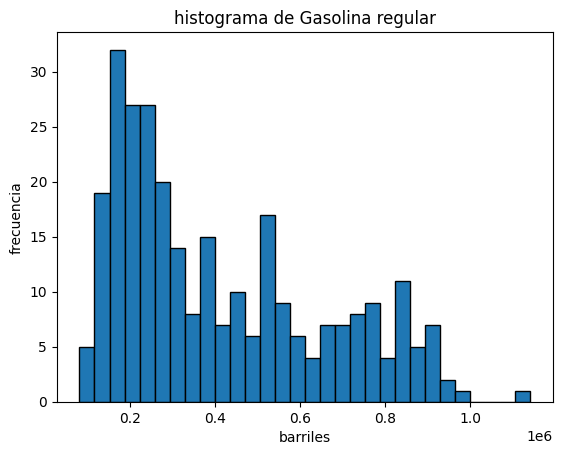

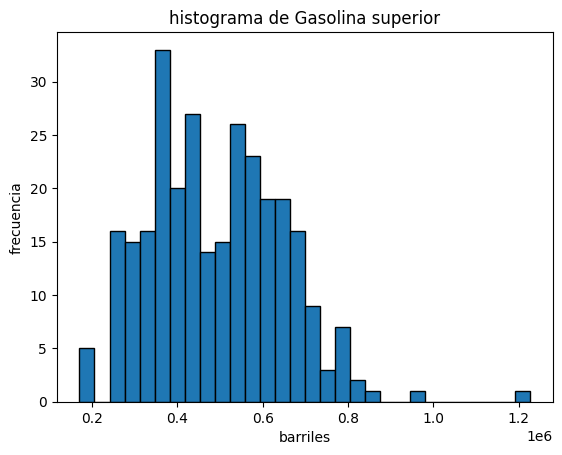

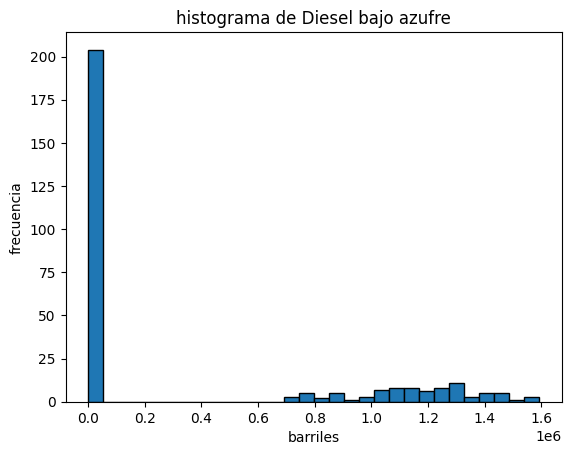

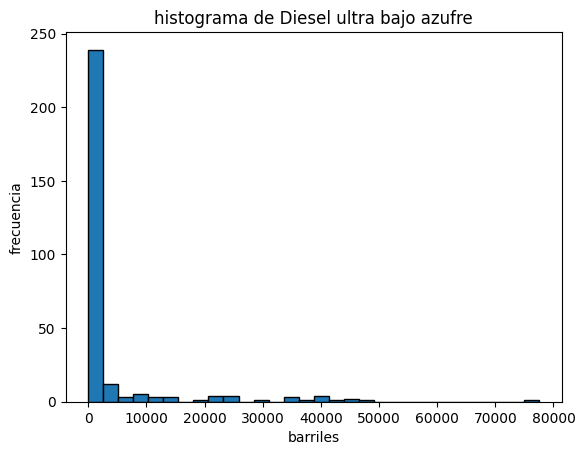

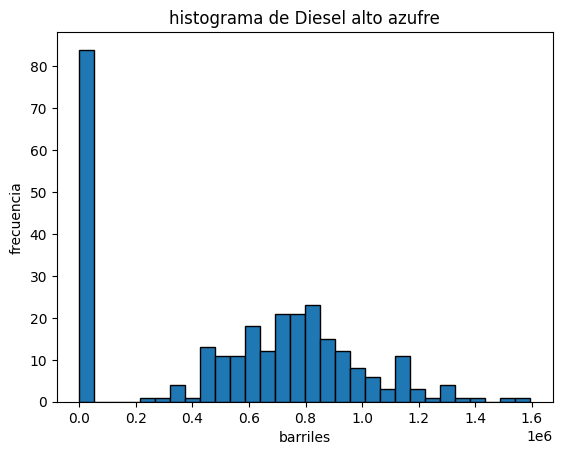

In [61]:
#explorar el comportamiento de las variables y ver si estan distribuidas normalmente en el caso de ser continuas
import matplotlib.pyplot as plt
gas = [
    "Gasolina regular", 
    "Gasolina superior", 
    "Diesel bajo azufre",
    "Diesel ultra bajo azufre",
    "Diesel alto azufre"
]

for col in gas: 

    plt.figure()
    plt.hist(importacion_clean_df[col].astype(float), bins = 30, edgecolor='black')
    plt.title(f"histograma de {col}")
    plt.xlabel("barriles")
    plt.ylabel("frecuencia")
    plt.show()


Cada uno de los histogramas, se puede ver que ninguno tiene la forma de una distribución normal y que tienden a tener sesgo positivo a la derecha. Al igual que se peude notar que en diesel tiene muchas imporaciones nulas. Lo que destaca en la gasolina regular es que la mayoria de importaciones se concentran en 0.1 y 0.4 millones de barriles. Con la gasolina superior, lo que pasa es que tiene una concentración imporante aproximadamente de 0.3 a 0.6 millones de barriles. En los histogramas de diesel, el que parece que tiene una forma más similar a la de la distribución normal es la de alto azufre, sin embargo, no es normal, ya que tiene muchos valores nulos. 


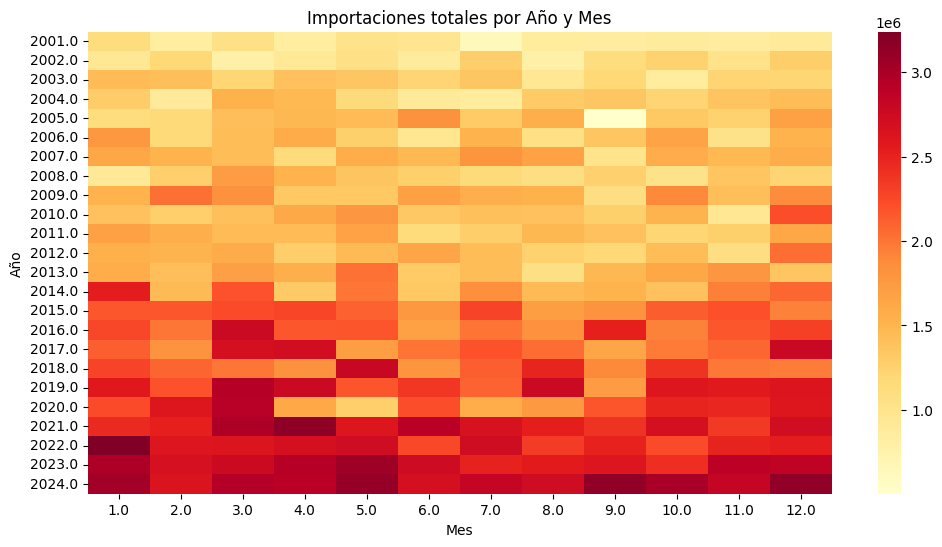

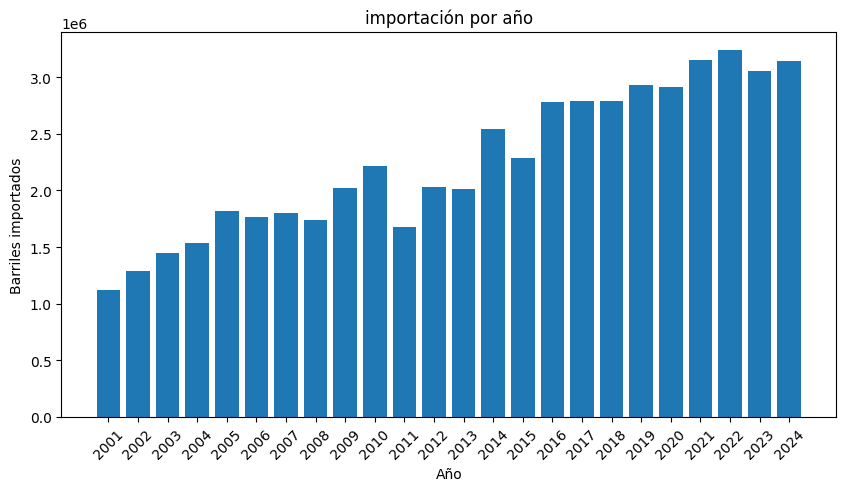

In [62]:
import seaborn as sns

columnas_necesarias = [
    "Gasolina regular", "Gasolina superior", 
    "Diesel bajo azufre", "Diesel ultra bajo azufre", "Diesel alto azufre"
]

for col in columnas_necesarias:
    importacion_clean_df[col] = pd.to_numeric(importacion_clean_df[col], errors="coerce")
importacion_clean_df["Total_mensual"] = importacion_clean_df[columnas_necesarias].sum(axis=1)

importacion_clean_df["Total_mensual"] = pd.to_numeric(importacion_clean_df["Total_mensual"], errors="coerce")
importaciones_anuales = (
    importacion_clean_df.groupby(["Año", "Mes"])["Total_mensual"]
    .sum()
    .reset_index()
)

# mes con más importaciones por cada año
meses_maximos = (
    importaciones_anuales.loc[
        importaciones_anuales.groupby("Año")["Total_mensual"].idxmax()
    ]
    .sort_values("Año")
)

# Año y Mes
importaciones_por_mes_ano = (
    importacion_clean_df.groupby(["Año", "Mes"])["Total_mensual"]
    .sum()
    .reset_index()
)

tabla_heatmap = importaciones_por_mes_ano.pivot(index="Año", columns="Mes", values="Total_mensual")
tabla_heatmap = tabla_heatmap.astype(float)

plt.figure(figsize=(12, 6))
sns.heatmap(tabla_heatmap, cmap="YlOrRd", annot=False)
plt.title("Importaciones totales por Año y Mes")
plt.xlabel("Mes")
plt.ylabel("Año")
plt.show()



# print("Mes con más importaciones por año:")
# print(meses_maximos)

plt.figure(figsize=(10,5))
plt.bar(meses_maximos["Año"].astype(int).astype(str),
        meses_maximos["Total_mensual"])
plt.title("importación por año")
plt.xlabel("Año")
plt.ylabel("Barriles importados")
plt.xticks(rotation=45)
plt.show()

0     Año  Gasolina regular  Gasolina superior  Diesel bajo azufre  \
0  2001.0         233643.75          373963.96                 0.0   
1  2002.0         222408.00          440677.81                 0.0   
2  2003.0         269981.86          459025.69                 0.0   
3  2004.0         275539.38          486880.82                 0.0   
4  2005.0         266018.37          566618.55                 0.0   

0  Diesel ultra bajo azufre  Diesel alto azufre  
0                       0.0          575559.680  
1                       0.0          703749.810  
2                       0.0          873103.096  
3                       0.0          809194.950  
4                       0.0         1212610.530  


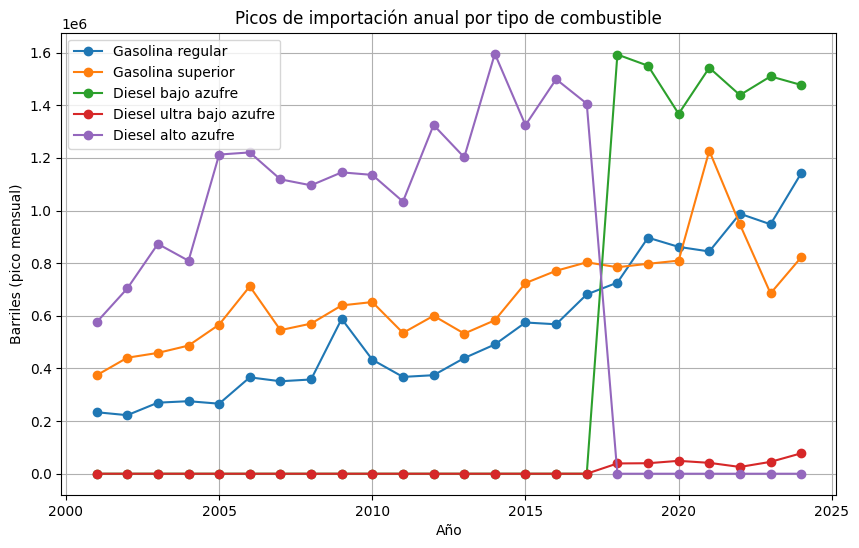

In [65]:
#picos en importaciones por anio por tipo de combustibles
for col in columnas_necesarias:
    importacion_clean_df[col] = pd.to_numeric(importacion_clean_df[col], errors="coerce")

picos_por_anio = (
    importacion_clean_df.groupby("Año")[columnas_necesarias]
    .max()  # el pico anual
    .reset_index()
)

print(picos_por_anio.head()) 

plt.figure(figsize=(10,6))
for col in columnas_necesarias:
    plt.plot(picos_por_anio["Año"], picos_por_anio[col], marker='o', label=col)

plt.title("Picos de importación anual por tipo de combustible")
plt.xlabel("Año")
plt.ylabel("Barriles (pico mensual)")
plt.legend()
plt.grid(True)
plt.show()